<a href="https://colab.research.google.com/github/22130056-HoHoangDuy/Labs_ML/blob/main/22130056_HoHoangDuy_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression


In [163]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Labs_Datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_Labs_Datasets


In [164]:
#Task1
df = pd.read_csv('lab3_dataset1.csv')
#Task1.1
df.head()

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


Model intercept: 0.3999999999999999
Model slope (coefficient): 0.7999999999999999


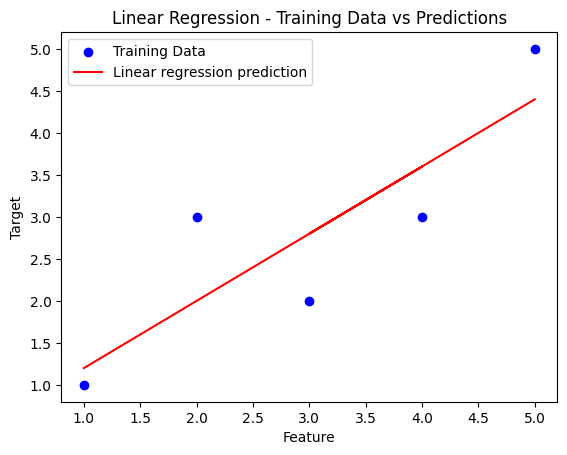

In [165]:
#Task1.2
X = df[['x']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"Model intercept: {intercept}")
print(f"Model slope (coefficient): {slope}")

y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, y_pred, color='red', label='Linear regression prediction')

plt.title('Linear Regression - Training Data vs Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [166]:
#Task2
df = pd.read_csv('lab3_dataset2.csv')
df.head()

,id,x1,x2,x3,y
0,1,2.41710,0.83595,0.72469,18.21900
1,2,1.98150,-1.01800,-1.06400,0.55271
2,3,1.82850,0.49281,-0.89035,7.00510
3,4,1.50480,-1.74070,-1.72290,-7.06310
4,5,0.27489,-0.31811,-0.56168,0.74380


In [167]:

X = df[['x1', 'x2', 'x3']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

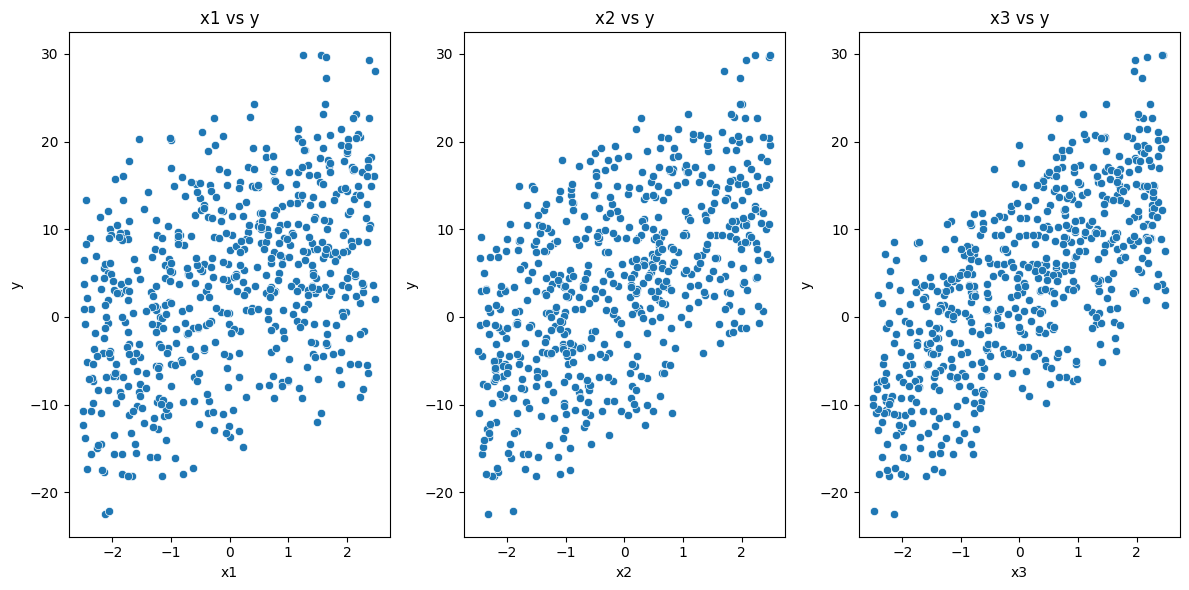

In [168]:
#Task2.1
plt.figure(figsize=(12, 6))

# x1 vs y
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['x1'], y=df['y'])
plt.title('x1 vs y')

# x2 vs y
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['x2'], y=df['y'])
plt.title('x2 vs y')

# x3 vs y
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['x3'], y=df['y'])
plt.title('x3 vs y')

plt.tight_layout()
plt.show()

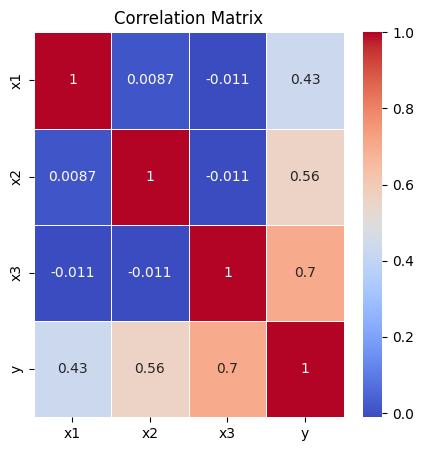

In [169]:
#Task2.2
correlation_matrix = df[['x1', 'x2', 'x3', 'y']].corr()
#Heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [170]:
#Task2.3
combinations = [
    ['x1'],
    ['x2'],
    ['x3'],
    ['x1', 'x2'],
    ['x1', 'x3'],
    ['x2', 'x3'],
    ['x1', 'x2', 'x3']
]

for combo in combinations:
    X_train_combo = X_train[combo]
    X_test_combo = X_test[combo]
    model = LinearRegression()
    model.fit(X_train_combo, y_train)
    y_pred = model.predict(X_test_combo)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Combination: {combo}")
    print(f"Mean Squared Error: {mse}\n")

    r2 = r2_score(y_test, y_pred)
    print("R² Score:", r2)


Combination: ['x1']
Mean Squared Error: 76.15433783733396

R² Score: 0.27710083004479535
Combination: ['x2']
Mean Squared Error: 69.58401286817033

R² Score: 0.33946999510391096
Combination: ['x3']
Mean Squared Error: 61.86057027053934

R² Score: 0.41278519160591465
Combination: ['x1', 'x2']
Mean Squared Error: 48.10046324912738

R² Score: 0.5434037515823757
Combination: ['x1', 'x3']
Mean Squared Error: 33.35995449028066

R² Score: 0.6833288280665122
Combination: ['x2', 'x3']
Mean Squared Error: 20.508455569539873

R² Score: 0.8053223765145066
Combination: ['x1', 'x2', 'x3']
Mean Squared Error: 7.120122652644836e-08

R² Score: 0.9999999993241185


In [171]:
#Task2.4
print("Variable x3 has the highest R² (0.413), indicating that it has the best correlation with the target variable y.")
print("Variable x1 has the lowest R² (0.277), indicating that it is the least suitable for the univariate linear regression model.")

Variable x3 has the highest R² (0.413), indicating that it has the best correlation with the target variable y.
Variable x1 has the lowest R² (0.277), indicating that it is the least suitable for the univariate linear regression model.


In [172]:
#Task3
df = pd.read_csv('lab3_dataset3.csv', sep=";", encoding='utf-8')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [173]:
#Task3.1
dependent_variable = 'quality'
independent_variables = [col for col in df.columns if col != dependent_variable]

X = df[independent_variables]
y = df[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training Data:")
print(X_train.head())
print(y_train.head())

print("\nTesting Data:")
print(X_test.head())
print(y_test.head())


Training Data:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
736             6.6              0.25         0.30           14.40      0.052   
1620            7.8              0.26         0.49            3.20      0.027   
336             6.3              0.23         0.33            1.50      0.036   
2302            6.0              0.26         0.18            7.00      0.055   
2673            7.9              0.37         0.31            2.85      0.037   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
736                  40.0                 183.0  0.99800  3.02       0.50   
1620                 28.0                  87.0  0.99190  3.03       0.32   
336                  15.0                 105.0  0.99100  3.32       0.42   
2302                 50.0                 194.0  0.99591  3.21       0.43   
2673                  5.0                  24.0  0.99110  3.19       0.36   

      alcohol  
736       9.1  
162

In [174]:
#Task3.2
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]


array([[-0.31132265, -0.28780076, -0.27645327,  1.55066891,  0.29420155,
         0.28211261,  1.06724029,  1.30065029, -1.13031916,  0.0940735 ,
        -1.14685943],
       [ 1.10470658, -0.18935432,  1.30066456, -0.62552076, -0.86167215,
        -0.43142553, -1.21962724, -0.70947795, -1.06354794, -1.49278025,
         0.64257527],
       [-0.66532995, -0.48469365, -0.02743466, -0.95583527, -0.44555762,
        -1.20442517, -0.79083958, -1.00605425,  0.87281754, -0.61119484,
         0.56123733],
       [-1.01933726, -0.18935432, -1.27252768,  0.1128293 ,  0.4329064 ,
         0.87672772,  1.32927719,  0.61193422,  0.13833408, -0.5230363 ,
        -1.22819737],
       [ 1.22270902,  0.89355654, -0.19344707, -0.69352669, -0.39932267,
        -1.79904028, -2.72038406, -0.97310132,  0.00479163, -1.14014609,
         1.13060291]])

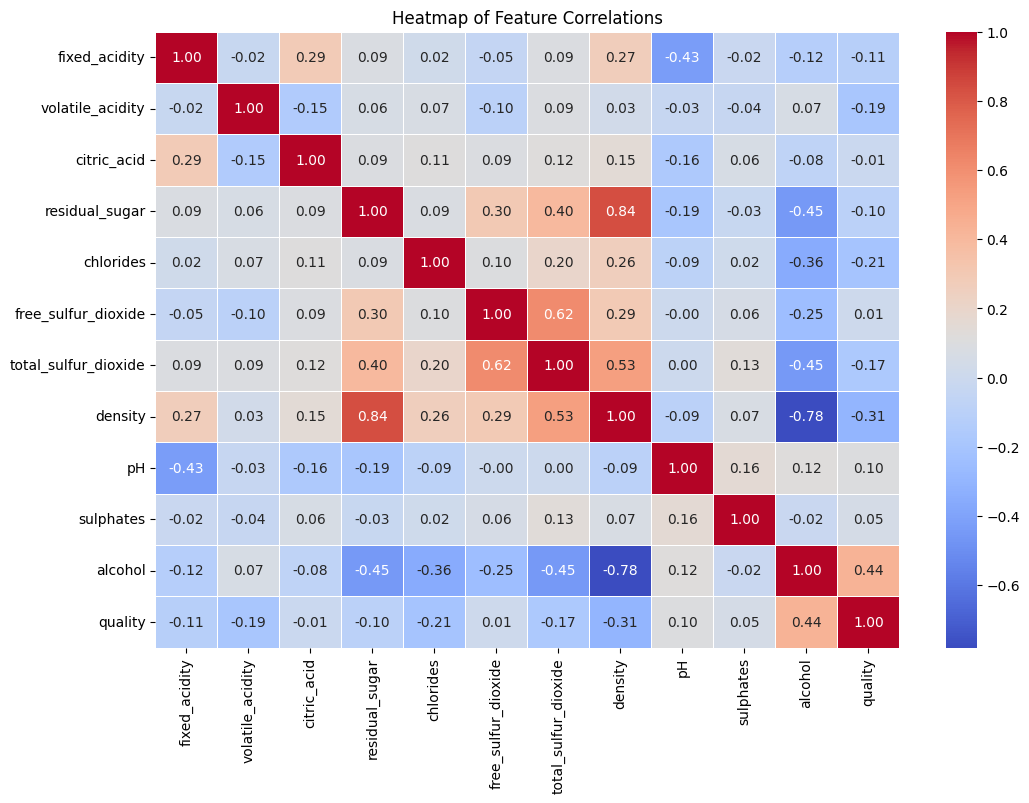

In [175]:
#Task3.3
#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()


In [176]:
#Task3.4
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse, r2

k_best = SelectKBest(score_func=f_regression, k=5)
X_train_k_best = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

np.selected_feature = X.columns[k_best.get_support()]
np.selected_feature

Index(['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'density',
       'alcohol'],
      dtype='object')

In [177]:
#Task3.5
print("The model with all features performs slightly better than the model using only the top 5 features.")
print("Feature selection does not improve performance, and even slightly reduces the R² Score.")

The model with all features performs slightly better than the model using only the top 5 features.
Feature selection does not improve performance, and even slightly reduces the R² Score.


In [178]:
#Task4
df = pd.read_excel('lab3_dataset4.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [179]:
#Task4.1
X = df.iloc[:, :-2]
y1 = df.iloc[:, -2]
y2 = df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y1_train, y1_test = train_test_split(X_scaled, y1, test_size=0.3, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X_scaled, y2, test_size=0.3, random_state=42)

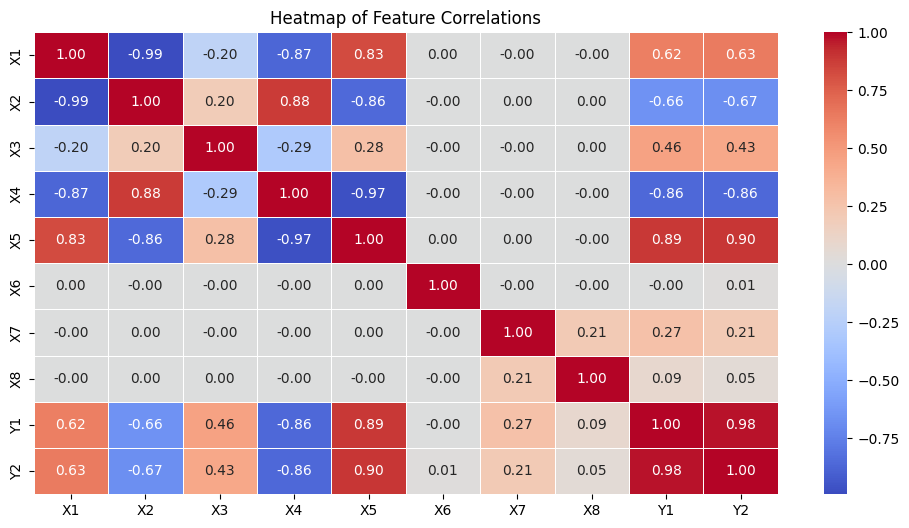

In [180]:
#Task4.2
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [181]:
#Task 4.3
model_y1 = LinearRegression()
model_y2 = LinearRegression()
model_y1.fit(X_train, y1_train)
model_y2.fit(X_train, y2_train)

y1_pred = model_y1.predict(X_test)
y2_pred = model_y2.predict(X_test)

rmse_y1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2_y1 = r2_score(y1_test, y1_pred)

rmse_y2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_y2 = r2_score(y2_test, y2_pred)

print(f"Heating Load (y1): RMSE = {rmse_y1}, R² Score = {r2_y1}")
print(f"Cooling Load (y2): RMSE = {rmse_y2}, R² Score = {r2_y2}")

Heating Load (y1): RMSE = 2.973132346093029, R² Score = 0.9128230460075941
Cooling Load (y2): RMSE = 3.205485182417949, R² Score = 0.8860072950624993


In [182]:
#Task4.4
select = SelectKBest(score_func=f_regression, k=5)
X_train_selected = select.fit_transform(X_train, y1_train)
X_test_selected = select.transform(X_test)
print("Top Features Selected:", select.get_support(indices=True))
model_y1_selected = LinearRegression()
model_y1_selected.fit(X_train_selected, y1_train)
y1_pred_selected = model_y1_selected.predict(X_test_selected)
rmse_y1_selected = np.sqrt(mean_squared_error(y1_test, y1_pred_selected))
r2_y1_selected = r2_score(y1_test, y1_pred_selected)
print(f"Feature Selected - Heating Load (y1): RMSE = {rmse_y1_selected}, R² Score = {r2_y1_selected}")

Top Features Selected: [0 1 2 3 4]
Feature Selected - Heating Load (y1): RMSE = 4.017190234294342, R² Score = 0.84084583686277


In [183]:
#Task4.5
model_y1 = LinearRegression()
model_y2 = LinearRegression()

model_y1.fit(X_train, y1_train)
model_y2.fit(X_train, y2_train)

y1_pred = model_y1.predict(X_test)
y2_pred = model_y2.predict(X_test)

rmse_y1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2_y1 = r2_score(y1_test, y1_pred)

rmse_y2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r2_y2 = r2_score(y2_test, y2_pred)

print(f"Model WITHOUT feature selection:")
print(f"Heating Load (y1): RMSE = {rmse_y1:.4f}, R² Score = {r2_y1:.4f}")
print(f"Cooling Load (y2): RMSE = {rmse_y2:.4f}, R² Score = {r2_y2:.4f}")

select = SelectKBest(score_func=f_regression, k=5)
X_train_selected = select.fit_transform(X_train, y1_train)
X_test_selected = select.transform(X_test)


model_y1_selected = LinearRegression()
model_y2_selected = LinearRegression()

model_y1_selected.fit(X_train_selected, y1_train)
model_y2_selected.fit(X_train_selected, y2_train)

y1_pred_selected = model_y1_selected.predict(X_test_selected)
y2_pred_selected = model_y2_selected.predict(X_test_selected)

rmse_y1_selected = np.sqrt(mean_squared_error(y1_test, y1_pred_selected))
r2_y1_selected = r2_score(y1_test, y1_pred_selected)

rmse_y2_selected = np.sqrt(mean_squared_error(y2_test, y2_pred_selected))
r2_y2_selected = r2_score(y2_test, y2_pred_selected)

print(f"Model WITH feature selection:")
print(f"Heating Load (y1): RMSE = {rmse_y1_selected:.4f}, R² Score = {r2_y1_selected:.4f}")
print(f"Cooling Load (y2): RMSE = {rmse_y2_selected:.4f}, R² Score = {r2_y2_selected:.4f}")

rmse_improvement_y1 = rmse_y1 - rmse_y1_selected
r2_improvement_y1 = r2_y1_selected - r2_y1

rmse_improvement_y2 = rmse_y2 - rmse_y2_selected
r2_improvement_y2 = r2_y2_selected - r2_y2

print("Performance Improvement:")
print(f"Heating Load (y1): RMSE Improved by {rmse_improvement_y1:.4f}, R² Score Improved by {r2_improvement_y1:.4f}")
print(f"Cooling Load (y2): RMSE Improved by {rmse_improvement_y2:.4f}, R² Score Improved by {r2_improvement_y2:.4f}")


Model WITHOUT feature selection:
Heating Load (y1): RMSE = 2.9731, R² Score = 0.9128
Cooling Load (y2): RMSE = 3.2055, R² Score = 0.8860
Model WITH feature selection:
Heating Load (y1): RMSE = 4.0172, R² Score = 0.8408
Cooling Load (y2): RMSE = 3.8086, R² Score = 0.8391
Performance Improvement:
Heating Load (y1): RMSE Improved by -1.0441, R² Score Improved by -0.0720
Cooling Load (y2): RMSE Improved by -0.6031, R² Score Improved by -0.0469
